In [281]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm

In [282]:
LOS="0_0_0"
dir="/home/laila/OneDrive/1_Work/9_Supervision/2022_07_26_MyTests/Data/qM_0_qN_0/"

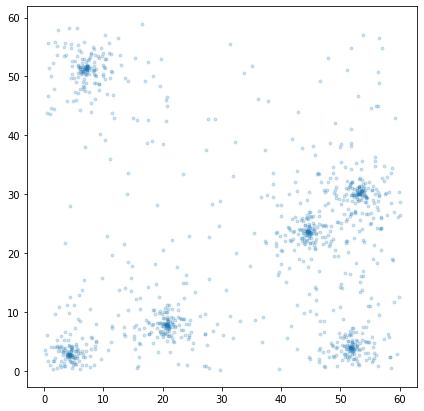

In [283]:
# Galaxies
fn=dir+f"{LOS}.lenses.dat"
galaxies=np.loadtxt(fn)
plt.subplots(figsize=(7,7))
plt.scatter(galaxies[:,0], galaxies[:,1], alpha=0.2, marker='.')

OSError: /home/laila/OneDrive/1_Work/9_Supervision/2022_07_26_MyTests/Data/qM_0_qN_0/LOS0_0_0_kappa.dat not found.

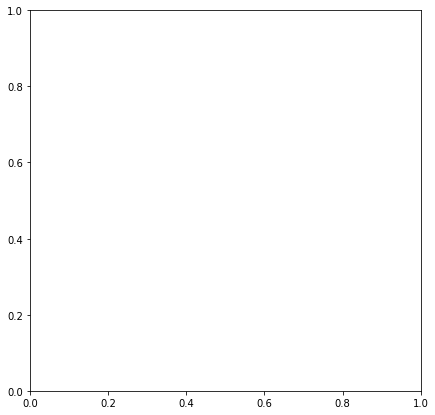

In [284]:
# kappa
plt.subplots(figsize=(7,7))
fn_kappa=dir+f"LOS{LOS}_kappa.dat"
kappa=np.loadtxt(fn_kappa)
plt.imshow(kappa, norm=LogNorm(), origin="lower")

In [285]:
# Shear Catalog
fn_gammaCat=dir+f"{LOS}.sources.dat"
gammaCat=np.loadtxt(fn_gammaCat)

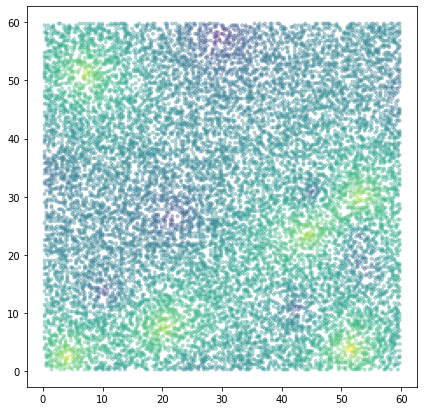

In [286]:
plt.subplots(figsize=(7,7))
plt.scatter(gammaCat[:,0], gammaCat[:,1], c=gammaCat[:,2]**2+gammaCat[:,3]**2, marker='.', alpha=0.3, norm=LogNorm())

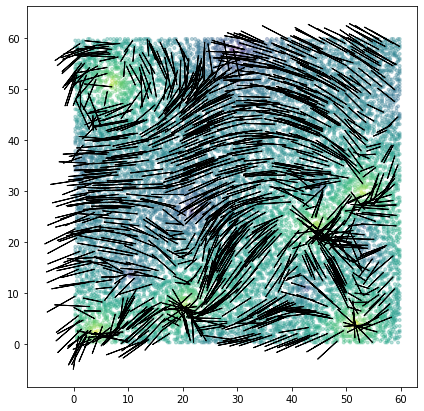

In [287]:
N=1000
dx=(gammaCat[:,2]/np.sqrt(gammaCat[:,2]**2+gammaCat[:,3]**2))[:N]
dy=(gammaCat[:,3]/np.sqrt(gammaCat[:,2]**2+gammaCat[:,3]**2))[:N]
plt.subplots(figsize=(7,7))

plt.scatter(gammaCat[:,0], gammaCat[:,1], c=gammaCat[:,2]**2+gammaCat[:,3]**2, marker='.', alpha=0.3, norm=LogNorm())

for i in range(N):
    
    x=gammaCat[:,0][i]
    y=gammaCat[:,1][i]
    position_c=x+1.0j*y
    phi=np.angle(position_c)
    gamma1=gammaCat[:,2][i]/np.sqrt(gammaCat[:,2]**2+gammaCat[:,3]**2)[i]
    gamma2=gammaCat[:,3][i]/np.sqrt(gammaCat[:,2]**2+gammaCat[:,3]**2)[i]

    gamma_c=gamma1+1.0j*gamma2


    if(gamma1<0):
        dx_1=-gamma1*np.sin(phi-np.pi/2)
        dy_1=gamma1*np.cos(phi-np.pi/2)
    else:
        dx_1=-gamma1*np.sin(phi)
        dy_1=gamma1*np.cos(phi)
   
    if(gamma2<0):
        dx_2=-gamma2*np.sin(phi-np.pi/4)
        dy_2=gamma2*np.cos(phi-np.pi/4)
    else:
        dx_2=-gamma2*np.sin(phi+np.pi/4)
        dy_2=gamma2*np.cos(phi+np.pi/4)

    plt.arrow(gammaCat[:,0][i], gammaCat[:,1][i], dx=5*(dx_1+dx_2), dy=5*(dy_1+dy_2))

    # plt.arrow(gammaCat[:,0][i], gammaCat[:,1][i], dx=-5*gamma1*np.sin(phi)-5*gamma2*np.sin(phi+np.pi/2), dy=5*gamma1*np.cos(phi)+5*gamma2*np.cos(phi+np.pi/2))
#    plt.arrow(gammaCat[:,0][i], gammaCat[:,1][i], dx=dx[i]*5, dy=dy[i]*5)


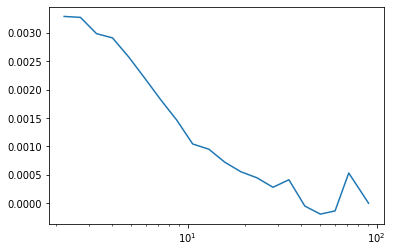

In [288]:
# measure xi+ / xi- with treecorr

import treecorr
shear_catalog=treecorr.Catalog(x=gammaCat[:,0], y=gammaCat[:,1], g1=gammaCat[:,2], g2=gammaCat[:,3], x_units="arcmin", y_units="arcmin")
galaxy_catalog=treecorr.Catalog(x=galaxies[:,0], y=galaxies[:,1], x_units="arcmin", y_units="arcmin")
NG=treecorr.NGCorrelation(min_sep=2, max_sep=100., nbins=20, sep_units='arcmin')
NG.process(galaxy_catalog, shear_catalog)

#plt.yscale('log')
plt.xscale('log')
plt.plot(NG.meanr, NG.xi)



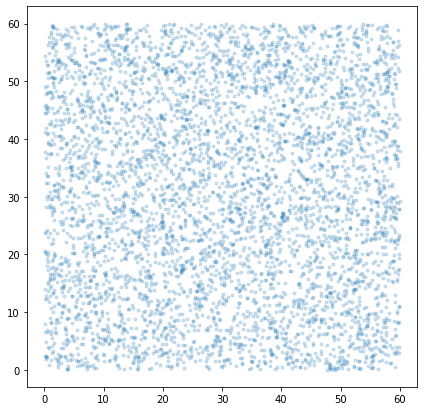

In [289]:
# Mocks
fn=dir+f"{LOS}.mocks.dat"
mocks=np.loadtxt(fn)
plt.subplots(figsize=(7,7))
plt.scatter(mocks[:,0], mocks[:,1], alpha=0.2, marker='.')

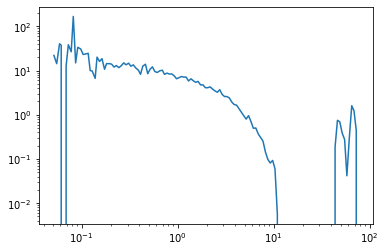

In [290]:
NN=treecorr.NNCorrelation(min_sep=0.05, max_sep=79.9, nbins=128, sep_units='arcmin')
NN.process(galaxy_catalog)

RR=treecorr.NNCorrelation(min_sep=0.05, max_sep=79.9, nbins=128, sep_units='arcmin')
randoms=treecorr.Catalog(x=mocks[:,0], y=mocks[:,1], x_units="arcmin", y_units="arcmin")
RR.process(randoms)


NN.calculateXi(rr=RR)

plt.xscale('log')
plt.yscale('log')
plt.plot(NN.meanr, NN.xi)